In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightning import pytorch as pl
from sklearn.model_selection import train_test_split
import torch
torch.set_float32_matmul_precision('medium')
from chemprop import data, featurizers, models, nn
pl.seed_everything(1)
from utils import *
# from data_utils import data_prep, prep_data, load_data, split_data, preprocess_data, create_data_loaders, create_mpnn_model
%load_ext autoreload
%autoreload 2

Seed set to 1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
input_path = r"C:\Users\rhys-\OneDrive\Documents\Github\thesis_results\data\nist\nist_train.parquet"
num_workers = 0 # number of workers for dataloader. 0 means using main process for data loading
smiles_column = "smiles" # name of the column containing SMILES strings
target_columns = np.arange(400,4002,2).astype(str) # list of names of the columns containing targets
df_input = pd.read_parquet(input_path)

nist_test_path = r"C:\Users\rhys-\OneDrive\Documents\Github\thesis_results\data\nist\nist_test.parquet"
nist_test_df = pd.read_parquet(nist_test_path)
test_datapoints = get_mol_datapoints(nist_test_df, smiles_column, target_columns)
test_dset = data.MoleculeDataset(test_datapoints, featurizers.SimpleMoleculeMolGraphFeaturizer())
test_loader = data.MolGraphDataLoader(test_dset, num_workers=num_workers)

In [4]:
for i in range(1, 9):
    globals()[f"fine_tuned_model_{i}"] = models.MPNN.load_from_checkpoint(f"fine_tuned_mpnn_{i}.ckpt")
    print(f"Fine-tuned MPNN {i} loaded successfully: {globals()[f'fine_tuned_model_{i}']}")

Fine-tuned MPNN 1 loaded successfully: MPNN(
  (message_passing): BondMessagePassing(
    (W_i): Linear(in_features=147, out_features=2200, bias=False)
    (W_h): Linear(in_features=2200, out_features=2200, bias=False)
    (W_o): Linear(in_features=2333, out_features=2200, bias=True)
    (dropout): Dropout(p=0.05, inplace=False)
    (tau): ReLU()
  )
  (agg): AttentiveAggregation(
    (W): Linear(in_features=2200, out_features=1, bias=True)
  )
  (bn): Identity()
  (predictor): RegressionFFN(
    (ffn): MLP(
      (0): Linear(in_features=2200, out_features=2200, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.05, inplace=False)
      (3): Linear(in_features=2200, out_features=2200, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.05, inplace=False)
      (6): Linear(in_features=2200, out_features=2200, bias=True)
      (7): ReLU()
      (8): Dropout(p=0.05, inplace=False)
      (9): Linear(in_features=2200, out_features=2200, bias=True)
      (10): ReLU()
      (11): Dropout(p=0

In [9]:

predictions = {}

for i in range(1, 9):
    model = globals()[f"fine_tuned_model_{i}"]
    
    # Create a PyTorch Lightning Trainer
    trainer = pl.Trainer()  # Adjust the GPU count as needed
    
    # Use the trainer to run the model on the test loader and get predictions
    model_predictions = trainer.predict(model, dataloaders=test_loader)
    
    # Flatten the predictions if needed
    model_predictions = [item for sublist in model_predictions for item in sublist]
    
    predictions[f"model_{i}"] = model_predictions

# Print the predictions for each model
for model_name, model_predictions in predictions.items():
    print(f"Predictions for {model_name}:")
    print(model_predictions)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:492: Your `predict_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
c:\Users\rhys-\m

Predicting DataLoader 0: 100%|██████████| 767/767 [00:05<00:00, 140.32it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 165.41it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 169.62it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 167.85it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 169.02it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 162.74it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 164.63it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 767/767 [00:04<00:00, 169.13it/s]
Predictions for model_1:
[tensor([0.0136, 0.0135, 0.0143,  ..., 0.0105, 0.0094, 0.0110]), tensor([0.0074, 0.0075, 0.0073,  ..., 0.0143, 0.0150, 0.0147]), tensor([0.0279, 0.0280, 0.0275,  ..., 0.0193, 0.0186, 0.0188]), tensor([0.0314, 0.0315, 0.0311,  ..., 0.0198, 0.0191, 0.0193]), tensor([-0.0084, -0.0090, -0.0081,  ...,  0.0169,  0.0166,  0.0170]), tensor([ 0.0419,  0.0428,  0.0420,  ..., -0.0061, -0.0053, -0.0045]), tensor([ 0.0217,  0.0203,  0.0220,  ..., -0.0025, -0.0020, -0.0015]), tensor([0.0064, 0.0064, 0.0069,  ..., 0.0026, 0.0042, 0.0043]), tensor([0.0392, 0.0399, 0.0398,  ..., 0.0064, 0.0072, 0.0087]), tensor([0.0184, 0.0181, 0.0186,  ..., 0.0154, 0.0159, 0.0154]), tensor([0.0277, 0.0273, 0.0273,  ..., 0.0011, 0.0023, 0.0031]), tensor([0.0702, 0.0698, 0.0701,  ..., 0.0370, 0.0363, 0.0355]), tensor([0.0522, 0.0519, 0.0518,  ..., 0.0212, 0.0214, 0.0210]), tensor([0.0098, 0.0103, 0.0099,  ..., 0.0050, 0.

In [10]:
def calculate_rmse(predicted_spectra, reference_spectra):
    if len(predicted_spectra) != len(reference_spectra):
        print(len(predicted_spectra), len(reference_spectra))
        raise ValueError("Length of predicted and reference spectra lists should be the same.")

    rmse_values = []

    for i in range(len(predicted_spectra)):
        predicted = np.array(predicted_spectra[i]).squeeze()
        reference = np.array(reference_spectra[i]).squeeze()

        if len(predicted) != len(reference):
            print(len(predicted), len(reference))
            raise ValueError(f"Length of predicted and reference spectra at index {i} should be the same.")

        mse = np.mean((predicted - reference) ** 2)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)

    return rmse_values

def calculate_sis(predicted_spectra, reference_spectra):
    if len(predicted_spectra) != len(reference_spectra):
        print(len(predicted_spectra), len(reference_spectra))
        raise ValueError("Length of predicted and reference spectra lists should be the same.")

    sis_values = []

    for i in range(len(predicted_spectra)):
        predicted = np.array(predicted_spectra[i]).squeeze()
        reference = np.array(reference_spectra[i]).squeeze()

        if len(predicted) != len(reference):
            print(len(predicted), len(reference))
            raise ValueError(f"Length of predicted and reference spectra at index {i} should be the same.")

        # Set any negative values to zero
        predicted[predicted < 0] = 0
        reference[reference < 0] = 0

        # Add a small constant to avoid taking log of zero
        epsilon = 1e-10
        predicted += epsilon
        reference += epsilon

        # Ensure the spectra are normalized
        predicted = predicted / np.sum(predicted)
        reference = reference / np.sum(reference)

        # Check for negative values
        if np.any(predicted < 0) or np.any(reference < 0):
            raise ValueError("Spectra contain negative values")

        # Check for zero values
        if np.any(predicted == 0) or np.any(reference == 0):
            raise ValueError("Spectra contain zero values")

        # Calculate the SID
        sid = np.sum(predicted * np.log(predicted / reference)) + np.sum(reference * np.log(reference / predicted))

        # Calculate the SIS
        sis = 1 / (1 + sid)
        sis_values.append(sis)

    return sis_values

In [13]:
nist_test_df

,400,402,404,406,408,410,412,414,416,418,...,3984,3986,3988,3990,3992,3994,3996,3998,4000,smiles
47,0.027500,0.027500,0.027500,0.027500,0.027500,0.027500,0.027500,0.027500,0.027500,0.027500,...,0.018200,0.018200,0.018200,0.018200,0.018200,0.018200,0.018200,0.018200,0.018200,Clc1nc(Cl)nc(Nc2ccccc2Cl)n1
6024,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,...,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,0.006000,O=C1CCCCC1C1CCCCC1
1532,0.009700,0.009700,0.009700,0.009700,0.009700,0.009700,0.009700,0.009700,0.009700,0.009700,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,CCC1(c2ccccc2)NC(=O)N(C)C1=O
2955,0.019900,0.019900,0.019900,0.019900,0.019900,0.019900,0.019900,0.019900,0.019900,0.019900,...,0.003300,0.003300,0.003300,0.003300,0.003300,0.003300,0.003300,0.003300,0.003300,CCN1C(=O)NC(c2ccccc2)C1=O
3738,0.026100,0.026100,0.026100,0.026100,0.026100,0.026100,0.026100,0.026100,0.026100,0.026100,...,0.032100,0.032100,0.032100,0.032100,0.032100,0.032100,0.032100,0.032100,0.032100,C1COC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6312,0.023674,0.023674,0.023674,0.023674,0.023674,0.023674,0.023674,0.023674,0.023674,0.023674,...,0.005599,0.006056,0.005979,0.005709,0.005812,0.005308,0.004762,0.005125,0.005899,CC(=O)C1(C)CCOC1=O
6846,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,...,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,0.001100,CC(=O)CCC1CC(=O)OC1(C)C
2542,0.033600,0.033600,0.033600,0.033600,0.033600,0.033600,0.033600,0.033600,0.033600,0.033600,...,0.004400,0.004400,0.004400,0.004400,0.004400,0.004400,0.004400,0.004400,0.004400,CC1(C)CC(=O)CC(=O)C1
1655,0.004944,0.004944,0.004944,0.004944,0.004944,0.004944,0.004944,0.004944,0.004944,0.004944,...,0.000812,0.000890,0.000934,0.000989,0.000931,0.000868,0.000933,0.000976,0.000979,CC(=O)Oc1ccc(OC(C)=O)c2c1C1C=CC2C1


In [15]:
import numpy as np

# ... (Previous code remains the same)

# Calculate the average predictions
num_models = len(predictions)
num_samples = len(predictions["model_1"])
avg_predictions = np.zeros((num_samples, len(predictions["model_1"][0])))

for i in range(1, num_models + 1):
    model_predictions = np.array(predictions[f"model_{i}"])
    avg_predictions += model_predictions

avg_predictions /= num_models

# Get the true values from the nist_test_df DataFrame
true_values = nist_test_df.drop(columns=['smiles']).values

# Calculate the SIS between average predictions and true values
sis_values = calculate_sis(avg_predictions.tolist(), true_values.tolist())

# Print the average SIS
avg_sis = np.mean(sis_values)
print(f"Average SIS: {avg_sis}")

Average SIS: 0.6718023132194204


In [16]:
sis_values

[0.6845054831288555,
 0.7574068615832494,
 0.5695902651591706,
 0.634339861790977,
 0.4647780545919278,
 0.6937707956355388,
 0.5191969459598189,
 0.44514481567226444,
 0.6813754722282956,
 0.6673855200711097,
 0.43753855136586417,
 0.6122980951251014,
 0.8244721511476332,
 0.6682037791156601,
 0.4625630169659492,
 0.790028274466457,
 0.7562689786732868,
 0.46477421097201155,
 0.7933670162963035,
 0.6082166068234647,
 0.40706679080305946,
 0.7142225918721029,
 0.5675957751120454,
 0.7418331615855829,
 0.7820704929669993,
 0.793102693206793,
 0.555524608982848,
 0.6419988172057226,
 0.6818816033776812,
 0.7893564258605559,
 0.676618735749763,
 0.704724838429368,
 0.5822719558262368,
 0.6110864482963665,
 0.755317730146317,
 0.5713453268921397,
 0.6431726549592341,
 0.726901581786559,
 0.747649108863942,
 0.6378722015830178,
 0.33205467320840426,
 0.7713530069766971,
 0.5438697038000149,
 0.6313873995885637,
 0.5332505791791432,
 0.7384254288581027,
 0.5051043450829481,
 0.54843220753956

(array([ 1.,  1.,  5.,  5.,  4., 13., 19., 24., 28., 48., 43., 64., 73.,
        68., 92., 84., 88., 80., 22.,  5.]),
 array([0.22537536, 0.25914464, 0.29291391, 0.32668319, 0.36045246,
        0.39422174, 0.42799101, 0.46176028, 0.49552956, 0.52929883,
        0.56306811, 0.59683738, 0.63060666, 0.66437593, 0.6981452 ,
        0.73191448, 0.76568375, 0.79945303, 0.8332223 , 0.86699157,
        0.90076085]),
 <BarContainer object of 20 artists>)

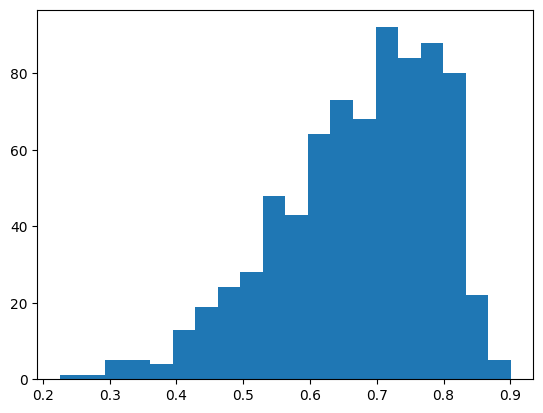

In [21]:
plt.hist(sis_values, bins=20)

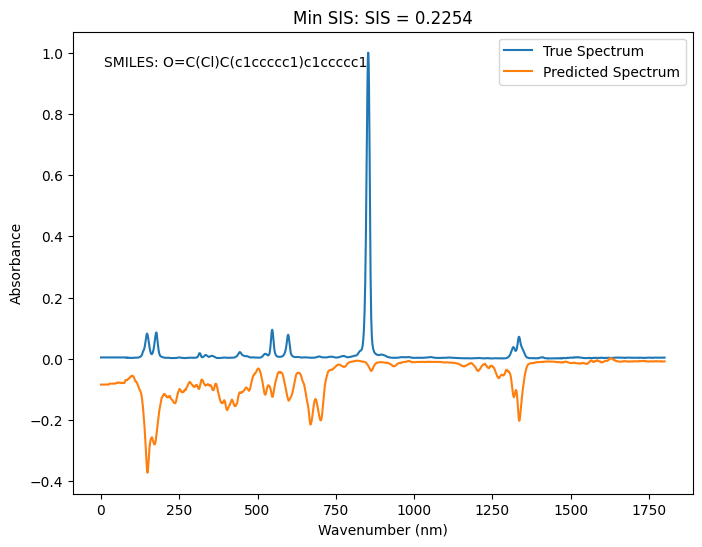

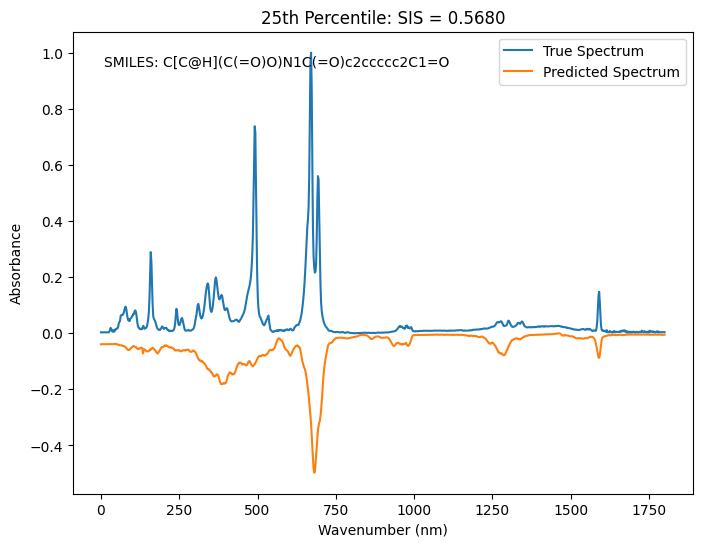

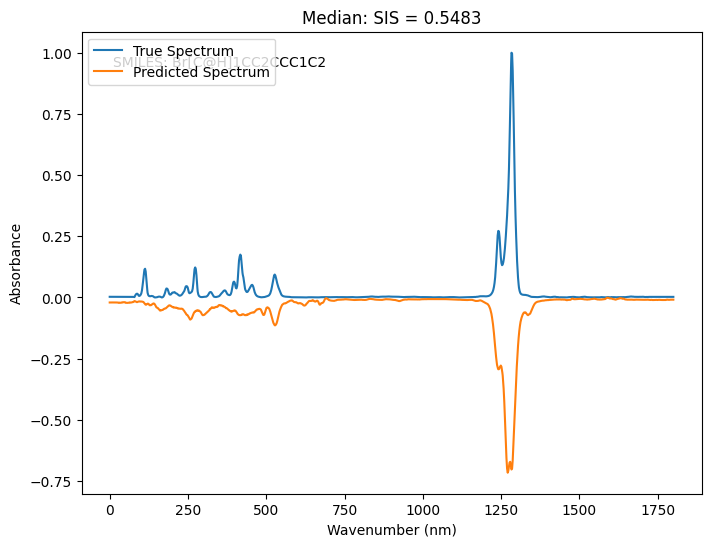

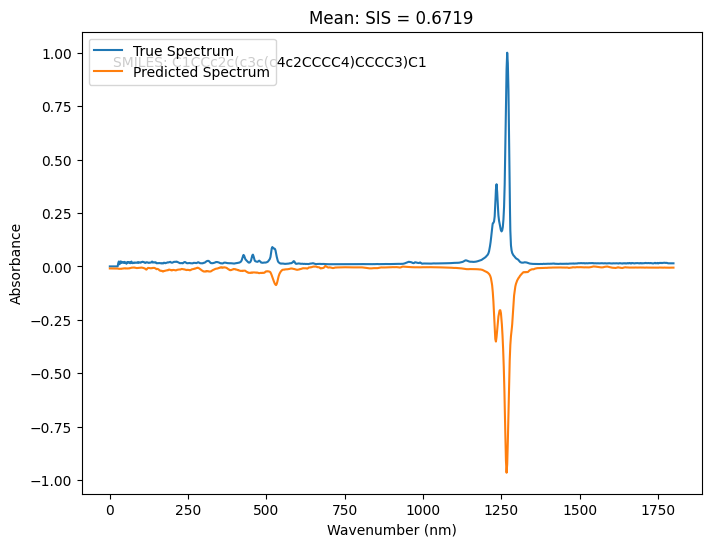

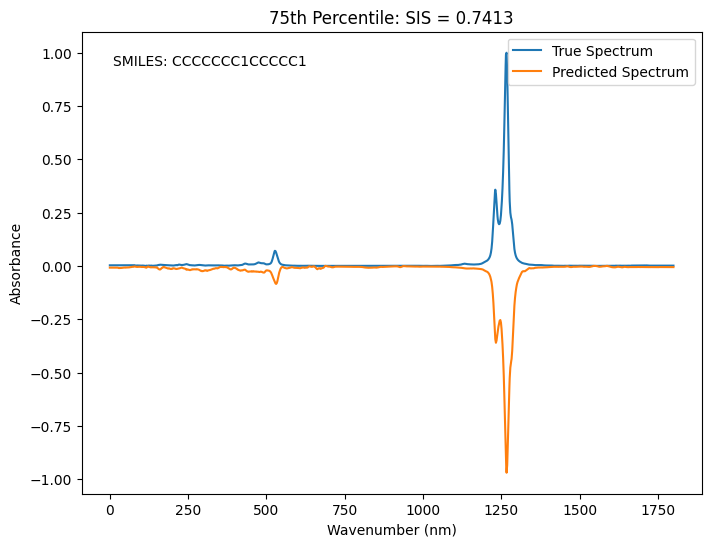

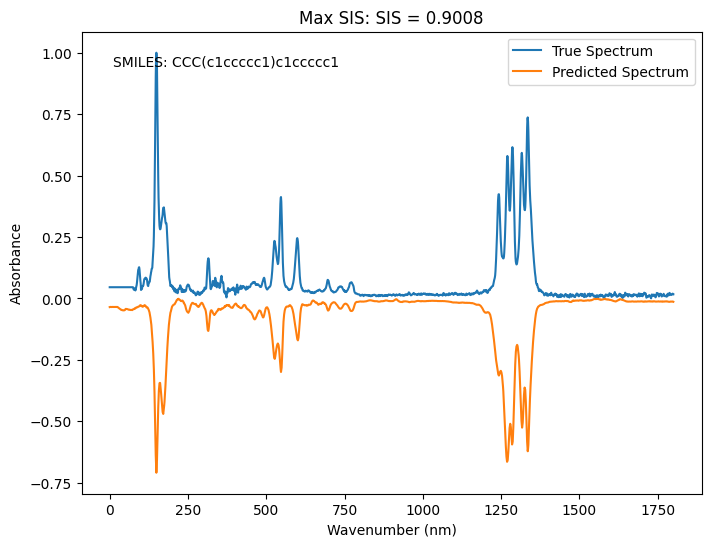

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code remains the same)

# Calculate the average predictions
num_models = len(predictions)
num_samples = len(predictions["model_1"])
avg_predictions = np.zeros((num_samples, len(predictions["model_1"][0])))

for i in range(1, num_models + 1):
    model_predictions = np.array(predictions[f"model_{i}"])
    avg_predictions += model_predictions

avg_predictions /= num_models

# Get the true values and SMILES strings from the nist_test_df DataFrame
true_values = nist_test_df.drop(columns=['smiles']).values
smiles_strings = nist_test_df['smiles'].values

# Calculate the SIS between average predictions and true values
sis_values = np.array(calculate_sis(avg_predictions.tolist(), true_values.tolist()))

# Calculate the 25th percentile, median, 75th percentile, min, max, and mean SIS values
percentile_25 = np.percentile(sis_values, 25)
median = np.median(sis_values)
percentile_75 = np.percentile(sis_values, 75)
min_sis = np.min(sis_values)
max_sis = np.max(sis_values)
mean_sis = np.mean(sis_values)

# Find the indexes for the calculated values
sorted_sis_values = np.sort(sis_values)
percentile_25_index = np.searchsorted(sorted_sis_values, percentile_25, side='left')
median_index = np.searchsorted(sorted_sis_values, median, side='left')
percentile_75_index = np.searchsorted(sorted_sis_values, percentile_75, side='left')
min_sis_index = np.where(sis_values == min_sis)[0][0]
max_sis_index = np.where(sis_values == max_sis)[0][0]
mean_sis_index = np.abs(sis_values - mean_sis).argmin()

# Create the "spectra_figs" directory if it doesn't exist
os.makedirs("spectra_figs", exist_ok=True)

# Plot the spectra individually and save them to the "spectra_figs" directory
indexes = [min_sis_index, percentile_25_index, median_index, mean_sis_index, percentile_75_index, max_sis_index]
titles = ['Min SIS', '25th Percentile', 'Median', 'Mean', '75th Percentile', 'Max SIS']

for i, index in enumerate(indexes):
    true_spectrum = true_values[index]
    predicted_spectrum = avg_predictions[index]
    smiles = smiles_strings[index]
    
    plt.figure(figsize=(8, 6))
    plt.plot(true_spectrum, label='True Spectrum')
    plt.plot(-predicted_spectrum, label='Predicted Spectrum')
    plt.title(f"{titles[i]}: SIS = {sis_values[index]:.4f}")
    plt.xlabel("Wavenumber (nm)")
    plt.ylabel("Absorbance")
    plt.legend()
    plt.annotate(f"SMILES: {smiles}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')
    
    # Save the plot to the "spectra_figs" directory
    plt.savefig(f"spectra_figs/{titles[i]}.png")
    
    # plt.close()  # Close the figure to free up memory